# Decision Trees Exercise
In this exercise you will show that ID3 is sub-optimal. Implement a simple version of Decision Tree, and will then apply a Decision Tree classsifier on the MNIST hand written digits dataset that we already saw.


## Suboptimality of ID3
Consider the following training set, where $\mathcal{X} = \{0, 1\}^3$ and $\mathcal{Y} =\{0, 1\}$:

$$
\begin{aligned}
((1, 1, 1), 1)\\
((1, 0, 0), 1)\\
((1, 1, 0), 0)\\
((0, 0, 1), 0)
\end{aligned}
$$

Suppose we wish to use this training set in order to build a decision tree of depth 2 (i.e. for each
input we are allowed to ask two questions of the form "$x_i = 0$?" before deciding on the label).

1. Suppose we run the ID3 algorithm up to depth 2 (namely, we pick the root node and its
children according to the algorithm, but instead of keeping on with the recursion, we stop
and pick leaves according to the majority label in each subtree, once we reach depth 2). 
Assume that the subroutine used to measure the quality of each feature is based on the information gain, and that if two features get the same score, one of them is picked arbitrarily. 
Show that the training error of the resulting decision tree is at least 1/4.
2. Find a decision tree of depth 2, which attains zero training error.


#### Answer
The answer is attached on a different PDF file (uploaded as well)

## Implementing Decision Tree From Scratch
In this exercise you will need to implement a simple version of Decision Tree from scratch. Your decision tree will handle **continuous input and output** (this should actually work also for binary input attributes).

* Compelete the skeleton class below
  - `X` is a matrix of data values (rows are samples, columns are attributes)
  - `y` is a vector of corresponding target values
  - `min_leaf` is the minimal number of samples in each leaf node
  
* For splitting criterion, use either **"Train Squared Error Minimization (Reduction in Variance)"** or **"Train Absolute Error Minimization"** (choose one). Whatever you choose, make sure you implement the splitting point decision efficiently (in $O(nlgn)$ time).

* The `predict` function will use mean of the target values in the leaf node matching each row of the given `X`. The result is a vector of predictions matching the number of rows in `X`.

* To check your decision tree implementation, use the boston dataset (`from sklearn.datasets import load_boston`) split the data set into train and test using (`from sklearn.model_selection import train_test_split`)

  - Use the following to estimate what are the best hyper parameters to use for your model
```
    for min_leaf in [1,5,10,100]:
      dt = DecisionTree(X, y, n, sz, min_leaf)
      mse = # mean square error over test set
      print("min_leaf:{0} --- oob mse: {1}".format(min_leaf, mse))
```
  
  - Using your chosen hyperparameters as a final model, plot the predictions vs. true values of all the samples in the training set . Use something like:
  ```
  y_hat = dt.predict(X_train)  # forest is the chosen model
  plt.scatter(y_hat, y_test)
  ```

In [ ]:
import numpy as np
from scipy.spatial.distance import squareform
from scipy.cluster import hierarchy
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.datasets import load_boston


In [ ]:
X, y = load_boston(return_X_y = True);
data = load_boston();
df = pd.DataFrame(data.data, columns = data.feature_names);
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
class Make_Node():
    def __init__(self, feature_idx = None, threshold = None, left = None, right = None, variance = None, value = None):
        self.feature_idx = feature_idx
        self.threshold = threshold
        self.left = left
        self.right = right
        self.variance = variance
        self.value = value #For leaf node

class RegressionTree():
    def __init__(self, max_depth, min_split):
        self.root = None
        self.min_split = min_split
        self.max_depth = max_depth


    def split(self, df, feature_idx, threshold):
        left_child = np.array([sample for sample in df if sample[feature_idx] <= threshold])
        right_child = np.array([sample for sample in df if sample[feature_idx] > threshold])
        return left_child, right_child

    def train_squared_error(self, y, y_left, y_right):

        weight_left = len(y_left) / len(y)
        weight_right = len(y_right)/ len(y)
        variance = weight_left * np.var(y_left) + weight_right * np.var(y_right)

        #code says to subtract the parents error by the error fo the children. Not sure why we aren't just returning the variance of the children.
        return variance 



    def get_leaf(self, y):
        return np.mean(y)

    def best_feature(self, df, n_samples, n_features):
        best_split_dict = {}
        max_reduction = np.inf #Change variable to max_trained_squared_error?

        for feat_idx in range(n_features):
            feat_vals = df[:, feat_idx]
            threshold_options = np.unique(feat_vals)

            for threshold in threshold_options:
                left_child, right_child = self.split(df, feat_idx, threshold)
            
                if len(left_child) > 0 and len(right_child) > 0:
                    y, left_y, right_y = df[:, -1], left_child[:, -1], right_child[:, -1]

                    trained_squared_error = self.train_squared_error(y, left_y, right_y)

                    if trained_squared_error < max_reduction: #We want minimum variance. (If the trained_error function were to subtract frm the variance of the parent, flip to greater than).
                            best_split_dict["feature_idx"] = feat_idx
                            best_split_dict["threshold"] = threshold
                            best_split_dict["left_child"] = left_child
                            best_split_dict["right_child"] = right_child
                            best_split_dict["variance"] = trained_squared_error
                            max_reduction = trained_squared_error
        
        return best_split_dict


    def fit(self, X, y):
        df = np.concatenate((X, y), axis =1)
        self.root = self.build_tree(df)



    def build_tree(self, df, level = 0):
        X, y = df[:, :-1], df[:,-1]
        n_samples, n_features = np.shape(X)
        best_split = {} #hold all features of the split in  dict.
        if n_samples>= self.min_split and level <=self.max_depth:    #a1) Find the best feature for our tree to split on, if we haven't reached past our required tree size.

            best_split = self.best_feature(df, n_samples, n_features)

            if best_split['variance'] > 0:                          #a2) Split the tree based off this best feature into left and right subtrees
                left_tree = self.build_tree(best_split['left_child'], level +1)
                right_tree = self.build_tree(best_split['right_child'], level+1)

                return Make_Node(best_split['feature_idx'], best_split['threshold'], left_tree, right_tree, best_split['variance']) #a3) Make current split into Parent Node
        
        leaf = self.get_leaf(y)                                      #b1) if tree size has already been reached, (or reduction = 0), then create and return a Leaf Node.

        return Make_Node(value = leaf)


  

    def print_tree(self, tree=None, indent=" ", columns = None, level = 0, child = 'root' ):
            ''' function to print the tree '''
            self.columns = columns
            level+= 1

            if not tree:
                tree = self.root

            if tree.value is not None: #If there is value, this means it is a leaf node: return the regression value in this leaf node.
                print(' '*level*3, child, ': ',np.round(tree.value, 4))

            else: #Perform Pre-order traversal-- Root, Left, Right, (leaf).
                if self.columns is None: #If no column names were given, just print by column idx
                    print(f'{child}: X_{str(tree.feature_idx)}, "<=", {tree.threshold}, "?", {tree.variance}')
                    
                else:
                    print(' '*level*3, f'{child}: X_{self.columns[tree.feature_idx]}, "<=", {tree.threshold}, "?", {np.round(tree.variance, 4)}')

                    # print(indent, " |%sleft: " % (indent))
                    self.print_tree(tree.left, indent + indent, self.columns, level, child = 'left')
                    # print(indent, " |%sright :" % (indent), end)
                    self.print_tree(tree.right, indent + indent, self.columns, level, child = 'right')


    def make_prediction(self, x, root):

        if root.value:
            return root.value
        
        if x[root.feature_idx] < root.threshold:
            return self.make_prediction(x, root.left)

        else:
            return self.make_prediction(x, root.right)



    def predict(self, X):
        ''' function to predict a single data point '''
        
        predictions = [self.make_prediction(x, self.root) for x in X]
        return predictions


In [ ]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values.reshape(-1,1)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=41)

In [ ]:
regressor = RegressionTree(min_split=2, max_depth=20)
regressor.fit(X_train, Y_train)
regressor.print_tree(columns= df.columns)

    root: X_INDUS, "<=", 7.38, "?", 32.2873
       left: X_RM, "<=", 6.23, "?", 8.5301
          left: X_AGE, "<=", 89.8, "?", 7.7302
             left: X_AGE, "<=", 69.6, "?", 5.0009
                left: X_AGE, "<=", 29.2, "?", 3.4346
                   left: X_CRIM, "<=", 0.05789, "?", 0.3838
                      left: X_NOX, "<=", 0.392, "?", 0.0369
                         left :  9.25
                         right: X_NOX, "<=", 0.4379, "?", 0.0103
                            left: X_CRIM, "<=", 0.03466, "?", 0.0004
                               left :  7.83
                               right :  8.075
                            right :  8.43
                      right: X_CRIM, "<=", 0.10659, "?", 0.0561
                         left :  5.57
                         right :  7.15
                   right: X_CRIM, "<=", 0.08447, "?", 3.1561
                      left: X_B, "<=", 364.61, "?", 1.8736
                         left :  12.8
                         right: X_RM, "<

                               right :  11.98
                            right: X_INDUS, "<=", 8.56, "?", 0.0468
                               left :  7.67
                               right :  6.745
                         right :  5.405
                      right: X_CRIM, "<=", 0.06076, "?", 0.5483
                         left :  5.64
                         right: X_CRIM, "<=", 1.83377, "?", 0.3148
                            left: X_RM, "<=", 7.802, "?", 0.006
                               left :  1.825
                               right :  3.32
                            right: X_CRIM, "<=", 5.66998, "?", 0.0001
                               left :  3.715
                               right :  2.96
                   right :  19.69
             right: X_CRIM, "<=", 9.51363, "?", 14.5268
                left: X_DIS, "<=", 1.4191, "?", 6.4444
                   left :  27.8
                   right: X_CRIM, "<=", 4.26131, "?", 4.4125
                      left: X_RM, "

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
for min_leaf in [2,5,10,100]: #Not working for values of 1 -- Need to fix this. Also, what should max depth be?
      regressor = RegressionTree(min_split=min_leaf, max_depth=20)
      regressor.fit(X_train, Y_train)
      mse = mean_squared_error(Y_test, regressor.predict(X_test)) # mean square error over test set
      print("min_leaf:{0} --- oob mse: {1}".format(min_leaf, mse))



min_leaf:2 --- oob mse: 55.08662720588235
min_leaf:5 --- oob mse: 48.14092386982571
min_leaf:10 --- oob mse: 50.37255103040444
min_leaf:100 --- oob mse: 29.07709343474029


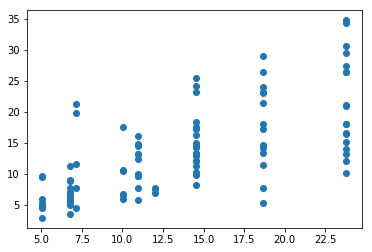

In [ ]:
regressor = RegressionTree(min_split=100, max_depth=100)
regressor.fit(X_train, Y_train)
y_hat = regressor.predict(X_test)  # forest is the chosen model
plt.scatter(y_hat, Y_test)

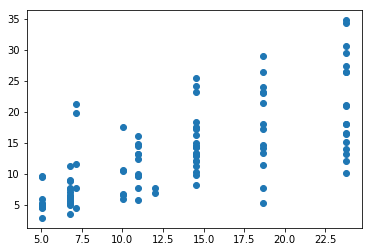

In [ ]:
from sklearn.tree import DecisionTreeRegressor


tree = DecisionTreeRegressor(min_samples_split=100, max_depth=100) 
tree.fit(X_train, Y_train)
y_pred = tree.predict(X_test)   
plt.scatter(y_pred, Y_test)

We can see that we got quite similar results as sklearn

## Using Decision Treefor Digits Classification
Remeber the MNIST dataset used - you will now test the power of decision trees on this problem.
This time you are given a free hand in choosing the test and train set sizes, model parameters (such as gain function and constraints over the trees) and features (whether to use binary pixel values or the original continous gray value).
- Choose which model parameters you wish to optimize, explain how would you do that, and find a model which you believe would have the minimal generalization error --- do this for both a single decision tree model, and a random forest.
  - You can use `sklearn.tree.DecisionTreeClassifier`
- Once you are satisfied with the model parameters, plot the importance of each of the pixels to the final decision.
- Last, estimate the class assignment probabilities for all the correctly classified and misclassified examples in your test data.
- Discuss your results.

In [ ]:
We will optimize max_depth, min_samples_leaf,  and the criterion (gini or entropy)

We will use GridSearchCV method

In [ ]:
from sklearn.model_selection import GridSearchCV
from keras.datasets import mnist
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay

C:\Users\Jonathan\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Because of lake of resources for calculations, we will take only 10,000 samples

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = [x.flatten() for x in x_train]
x_test = [x.flatten() for x in x_test]

x_train=x_train[0:10000]
x_test=x_test[0:10000]

y_train=y_train[0:10000]
y_test=y_test[0:10000]

The calculation takes about 5 minutes.

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 5, 10, 100],
    'min_samples_leaf': [5, 10, 20, 100],
    'criterion': ["gini", "entropy"]
}

grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")
grid_search.fit(x_train, y_train)


Fitting 4 folds for each of 32 candidates, totalling 128 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   36.5s
[Parallel(n_jobs=-1)]: Done 128 out of 128 | elapsed:  2.0min finished


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 5, 10, 100],
                         'min_samples_leaf': [5, 10, 20, 100]},
             scoring='accuracy', verbose=1)

In [ ]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=100, min_samples_leaf=5,
                       random_state=42)

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       980
           1       0.91      0.95      0.93      1135
           2       0.78      0.79      0.78      1032
           3       0.75      0.79      0.77      1010
           4       0.80      0.77      0.78       982
           5       0.78      0.75      0.76       892
           6       0.84      0.82      0.83       958
           7       0.89      0.86      0.88      1028
           8       0.79      0.76      0.77       974
           9       0.78      0.79      0.78      1009

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000

accuracy:  0.8226
F1:  0.8202128687259215


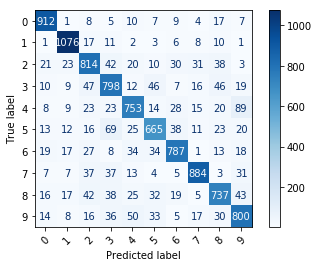

In [ ]:
dt_best = grid_search.best_estimator_

dt_best.fit(x_train,y_train)



from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report

print(classification_report(y_test, dt_best.predict(x_test)))





confusion_matrix = confusion_matrix(y_test, dt_best.predict(x_test))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)


from sklearn.metrics import f1_score, accuracy_score
print('accuracy: ', accuracy_score(y_test, dt_best.predict(x_test)))
print('F1: ', f1_score(y_test, dt_best.predict(x_test), average = 'macro'))

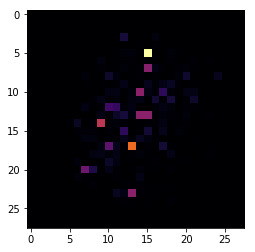

In [ ]:
plt.imshow(dt_best.feature_importances_.reshape(28,28), cmap= 'inferno')


The calculation takes about 5 minutes.

In [ ]:
from sklearn.ensemble import RandomForestClassifier


dtt = RandomForestClassifier()
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 5, 10, 100],
    'min_samples_leaf': [5, 10, 20, 100],
    'criterion': ["gini", "entropy"]
}

grid_search = GridSearchCV(estimator=dtt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")
grid_search.fit(x_train, y_train)

Fitting 4 folds for each of 32 candidates, totalling 128 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 128 out of 128 | elapsed:  4.1min finished


GridSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 5, 10, 100],
                         'min_samples_leaf': [5, 10, 20, 100]},
             scoring='accuracy', verbose=1)

In [ ]:
grid_search.best_estimator_


RandomForestClassifier(max_depth=100, min_samples_leaf=5)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       980
           1       0.98      0.99      0.98      1135
           2       0.93      0.93      0.93      1032
           3       0.93      0.93      0.93      1010
           4       0.94      0.93      0.93       982
           5       0.95      0.91      0.93       892
           6       0.94      0.96      0.95       958
           7       0.95      0.93      0.94      1028
           8       0.92      0.90      0.91       974
           9       0.90      0.92      0.91      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000

accuracy:  0.9401
F1:  0.9393582164597335


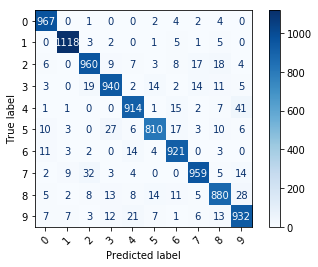

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

grid_search.best_estimator_
dtt_best = grid_search.best_estimator_

dtt_best.fit(x_train,y_train)

print(classification_report(y_test, dtt_best.predict(x_test)))

 




confusion_matrix = confusion_matrix(y_test, dtt_best.predict(x_test))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)

from sklearn.metrics import f1_score, accuracy_score
print('accuracy: ', accuracy_score(y_test, dtt_best.predict(x_test)))
print('F1: ', f1_score(y_test, dtt_best.predict(x_test), average = 'macro'))


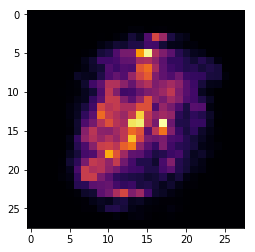

In [ ]:
plt.imshow(dtt_best.feature_importances_.reshape(28,28), cmap= 'inferno')


We can see the RandomForest provides much better results. 

Random forests consist of multiple single trees each based on a random sample of the training data. They are typically more accurate than single decision trees.

Trees are unpruned. While a single decision tree  is often pruned, a random forest tree is fully grown and unpruned, and so, naturally, the feature space is split into more and smaller regions (more pixels).
Trees are diverse. Each random forest tree is learned on a random sample, and at each node, a random set of features are considered for splitting. Both mechanisms create diversity among the trees.

A single decision tree needs pruning to avoid overfitting.

The randomness and voting mechanisms in random forests elegantly solve the overfitting problem.